# Exploratory Data Analysis of the Police shootings in the U.S

## Step 1. Reading the data

In [1]:
# import the necessary modules and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data that is a csv file and convert to a pandas dataframe

police = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
# Viewing the first 5 rows of the dataframe
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
# Viewing the last 5 rows
police.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
6027,6573,NaN,2021-02-06,shot,gun,NaN,M,NaN,Sarasota,FL,False,attack,Not fleeing,False,-82.522,27.328,True
6028,6584,NaN,2021-02-06,shot,gun,23.0,M,NaN,Mesa,AZ,True,other,Not fleeing,False,-111.875,33.408,True
6029,6586,Anthony Greco,2021-02-06,shot,gun,29.0,M,NaN,Phoenix,AZ,False,attack,Foot,False,-112.151,33.596,True
6030,6567,NaN,2021-02-07,shot,hatchet,NaN,M,NaN,Lacy Lakeview,TX,False,other,Foot,False,-97.090,31.643,True
6031,6570,NaN,2021-02-07,shot,gun,NaN,M,NaN,Bettendorf,IA,False,other,Not fleeing,False,-90.517,41.534,True


In [8]:
# Summary statistics are important to get an overview of the statistical values in the dataset
# including all columns 
police.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6032,NaN,NaN,NaN,3344.38,1887.24,3,1706.75,3350.5,4989.25,6587
name,5802,5785,Michael Johnson,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,6032,2068,2018-06-29,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manner_of_death,6032,2,shot,5730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armed,5822,96,gun,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5756,NaN,NaN,NaN,37.1675,13.0584,6,27,35,46,91
gender,6031,2,M,5765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,5409,6,W,2745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,6032,2659,Los Angeles,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,6032,51,CA,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are a multitude of NaN, of the non numeric type. 

In [10]:
# Amount of rows and columns
police.shape

(6032, 17)

In [11]:
# Viewing the column names
police.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

## Step 2. Cleaning the data

In [14]:
# Lets drop the id column, since it is redudant to the index

police.drop(columns=['id'], axis=1, inplace=True)

In [15]:
# Checking the datatypes of each column
police.dtypes

name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [25]:
# Checking each column data type and if there are any missing values in one step
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5802 non-null   object 
 1   date                     6032 non-null   object 
 2   manner_of_death          6032 non-null   object 
 3   armed                    5822 non-null   object 
 4   age                      5756 non-null   float64
 5   gender                   6031 non-null   object 
 6   race                     5409 non-null   object 
 7   city                     6032 non-null   object 
 8   state                    6032 non-null   object 
 9   signs_of_mental_illness  6032 non-null   bool   
 10  threat_level             6032 non-null   object 
 11  flee                     5688 non-null   object 
 12  body_camera              6032 non-null   bool   
 13  longitude                5738 non-null   float64
 14  latitude                

In [13]:
# Checking for missing values

police.isnull().sum()

id                           0
name                       230
date                         0
manner_of_death              0
armed                      210
age                        276
gender                       1
race                       623
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       344
body_camera                  0
longitude                  294
latitude                   294
is_geocoding_exact           0
dtype: int64

There are a lot of missing values. Lets visualize them.


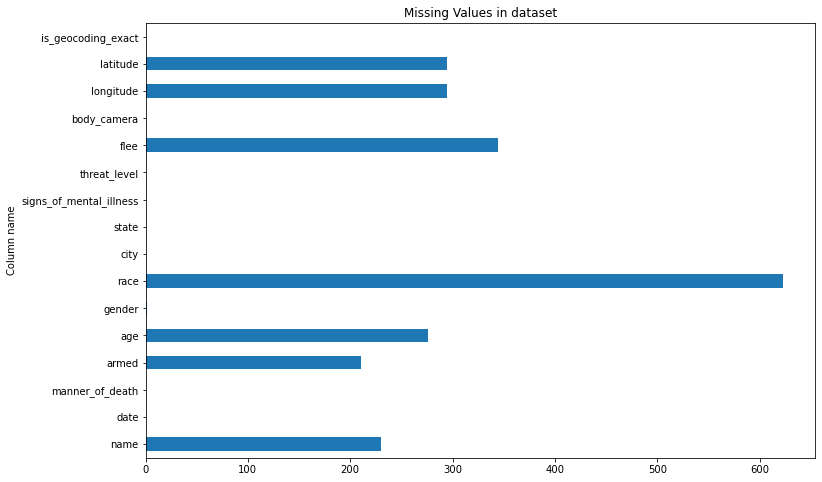

In [17]:
plt.figure(figsize=(12,8))
plt.title('Missing Values in dataset')
plt.ylabel('Column name')
police.isnull().sum().plot(kind='barh');

#### We will drop all missing values since the purpose of this is to analyze demographics and those with missing values will not be of use to our analysis

In [31]:
police.dropna(inplace=True)

In [33]:
# Now we will drop the columns longitude and latitude since we will be using city and state for our analysis and not coordinate points
police.drop(columns=['longitude', 'latitude'], inplace=True)

In [259]:
police.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,True


## Step 3. Exploring the Data

The columns that are most useful for our problem statement include name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness and flee. Lets explore these further. 

#### Lets look at the name column 

In [43]:

police['name'].unique()

array(['Tim Elliot', 'Lewis Lee Lembke', 'John Paul Quintero', ...,
       'Josue Drumond-Cruz', 'Andrew Hogan', 'Kevin Costlow'],
      dtype=object)

In [44]:
police['name'].describe()

count            4828
unique           4820
top       Jose Mendez
freq                2
Name: name, dtype: object

In [45]:
police['name'].value_counts()

Jose Mendez           2
Jeffrey Sims          2
Michael Ferguson      2
Michael Johnson       2
Michael Brown         2
                     ..
Samuel E. Rice        1
Mickel Erich Lewis    1
Edward Van McCrae     1
Lamar Harris          1
Joshua Green          1
Name: name, Length: 4820, dtype: int64

So we see we have a multiple victims with the same name, but no more than 2 people with the same name. We will explore this further to check for duplicate entries.

#### Let's look at the date column

In [46]:
police['date'].unique()

array(['2015-01-02', '2015-01-03', '2015-01-04', ..., '2021-02-04',
       '2021-02-05', '2021-02-06'], dtype=object)

In [47]:
police['date'].describe()

count           4828
unique          1934
top       2018-01-06
freq               9
Name: date, dtype: object

In [49]:
police['date'].value_counts()

2018-01-06    9
2018-04-05    8
2018-04-01    8
2015-07-07    8
2019-01-28    8
             ..
2020-04-04    1
2015-11-14    1
2019-09-23    1
2018-11-08    1
2018-02-24    1
Name: date, Length: 1934, dtype: int64

This shows that the date with the most police fatal shootings occured on January 6, 2018 with a total of 9. 

In [93]:
police['date'].max()

'2021-02-06'

The most recent shooting this dataset captures is on February 6th of 2021. 

### Manner of Death

In [51]:
police['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [52]:
police['manner_of_death'].describe()

count     4828
unique       2
top       shot
freq      4571
Name: manner_of_death, dtype: object

In [53]:
police['manner_of_death'].value_counts()

shot                4571
shot and Tasered     257
Name: manner_of_death, dtype: int64

This shows the two methods of death are being shot or being shot and tasered.

In [56]:
police['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'BB gun',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'crossbow', 'unknown weapon', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'spear', 'chair', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'baton', 'crowbar', 'oar',
       'machete and gun', 'air conditio

In [57]:
police['armed'].describe()

count     4828
unique      95
top        gun
freq      2849
Name: armed, dtype: object

In [94]:
police['armed'].value_counts()

gun                                 2849
knife                                729
unarmed                              365
toy weapon                           179
vehicle                              154
                                    ... 
baseball bat and fireplace poker       1
pen                                    1
ice pick                               1
metal rake                             1
chain saw                              1
Name: armed, Length: 95, dtype: int64

There are a lot of various items that the victims were armed with, and we see the most frequent is being armed with a gun. 

### Now we will check the age column 

In [66]:
# Lets see the summary statistics for the age of the victims
police['age'].describe()

count    4828.000000
mean       36.686620
std        12.773439
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [64]:
# Lets find the oldest victim(s)
police['age'].max()

91.0

In [63]:
police[police['age'] == 91.0]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
2161,Frank W. Wratny,2017-03-08,shot,gun,91.0,M,W,Union Township,PA,False,attack,Not fleeing,False,True
5954,Betty Francois,2021-01-09,shot,gun,91.0,F,W,Victorville,CA,False,attack,Not fleeing,False,True


In [65]:
# Lets find the youngest victim(s)
police['age'].min()

6.0

In [67]:
police[police['age'] == 6.0]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
833,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,True
2907,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False,True


As we can see the youngest victims were only 6 years old, and they were both unarmed. 

In [ ]:
# Lets visualize the distribution of ages 

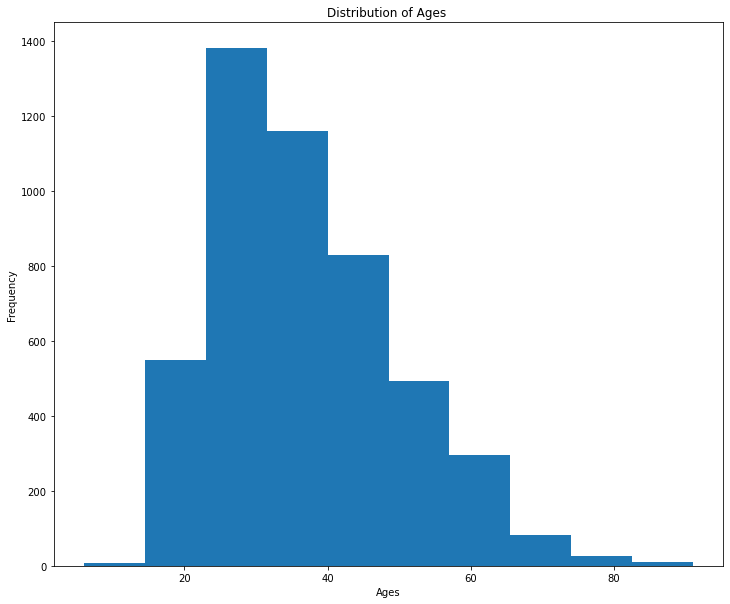

In [79]:
plt.figure(figsize=(12,10))
plt.title("Distribution of Ages ")
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.hist(police['age']);

This shows the ages are not normally distrubuted but skewed right. The majority of the victims are less than 40 years old. 

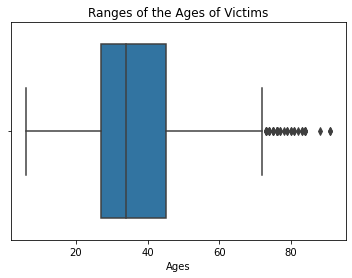

In [80]:
# Creating a box plot of Ages to check for outliers 

sns.boxplot(x=police['age']); #using variable of average participation 
plt.xlabel('Ages')
plt.title('Ranges of the Ages of Victims');

As we can see there are outliers, that ages are above 70 years old. 

### Now we will explore the gender of the victims

In [69]:
police['gender'].describe()

count     4828
unique       2
top          M
freq      4592
Name: gender, dtype: object

In [70]:
police['gender'].value_counts()

M    4592
F     236
Name: gender, dtype: int64

So the ratio is much higher for men, than women being fatally shot by police. 


### Now we will explore the race of the victims

In [81]:
# Lets get a list of the unique races
police['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [103]:
# If we check the source for a greater understanding, it tells us that each race is as mapped as following:
race_values= {'A':'Asian', 
    'W':'White',
    'H':'Hispanic',
    'B' : 'Black',
    'O': 'Other',
    'N':'Native', }
    
# Now will convert the values in the race column to the race as listed above for a clearer understanding.
police['race'] = police['race'].map(race_values)

In [104]:
police['race'].describe()

count      4828
unique        6
top       White
freq       2470
Name: race, dtype: object

In [ ]:
We see out of the 6 listed, the most frequent to be shot by the police is W, which equals White. 

In [105]:
# Total amounts for each race
police['race'].value_counts()

White       2470
Black       1284
Hispanic     875
Asian         84
Native        73
Other         42
Name: race, dtype: int64

### Now we will explore the city, state of the incidents 

In [71]:
# Lets check the number of different cities in the data set
police['city'].nunique()

2257

In [75]:
police['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Dixon', 'Caroline County',
       'Laytonsville'], dtype=object)

In [76]:
police['city'].describe()

count            4828
unique           2257
top       Los Angeles
freq               68
Name: city, dtype: object

In [84]:
police['city'].value_counts()

Los Angeles      68
Phoenix          68
Houston          46
Las Vegas        43
San Antonio      42
                 ..
Benton Harbor     1
Wales             1
Bemidji           1
Brentwood         1
Cedar Hill        1
Name: city, Length: 2257, dtype: int64

The city with the most fatal police shootings are tied at 68 with Los Angeles and Phoenix. 

In [87]:
police['state'].nunique()

51

In [88]:
police['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'UT', 'AR', 'IL', 'NV', 'NM', 'VA', 'NJ', 'IN', 'MN', 'KY',
       'MA', 'MO', 'NH', 'ID', 'MD', 'NE', 'MI', 'MT', 'GA', 'FL', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DC', 'WV', 'DE',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

This shows there has been a fatal police shooting in all 50 states and including Washington D.C. 

In [89]:
police['state'].describe()

count     4828
unique      51
top         CA
freq       691
Name: state, dtype: object

In [91]:
police['state'].value_counts()

CA    691
TX    416
FL    336
AZ    216
CO    168
GA    165
OK    147
OH    145
NC    144
WA    126
TN    125
MO    118
IN     98
LA     98
IL     96
PA     94
AL     92
VA     92
NY     91
NM     89
WI     85
NV     84
KY     82
SC     78
MI     77
OR     74
MD     72
AR     66
UT     64
MN     62
MS     58
NJ     55
KS     50
WV     41
ID     37
AK     35
MA     34
IA     32
MT     28
NE     24
HI     23
ME     17
CT     17
DC     15
WY     14
NH     13
SD     13
DE     11
ND     10
VT      8
RI      2
Name: state, dtype: int64

California is the state with the most fatal shootings and Rhode Island has the least with only 2. 

### Signs of mental illness

In [97]:
police['signs_of_mental_illness'].value_counts()

False    3652
True     1176
Name: signs_of_mental_illness, dtype: int64

In [96]:
police['signs_of_mental_illness'].describe()

count      4828
unique        2
top       False
freq       3652
Name: signs_of_mental_illness, dtype: object

This shows that False being the indictor of no signs of mental illness is higher for the victims.

### Flee 

In [98]:
police['flee'].nunique()

4

In [99]:
police['flee'].describe()

count            4828
unique              4
top       Not fleeing
freq             3227
Name: flee, dtype: object

In [100]:
police['flee'].value_counts()

Not fleeing    3227
Car             731
Foot            703
Other           167
Name: flee, dtype: int64

The rate of not fleeing from the scene of the crime is the highest among victims.

## Step 4. Exploratory Data Analysis

In [107]:
police.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,4828,4820,Jose Mendez,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,4828,1934,2018-01-06,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manner_of_death,4828,2,shot,4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armed,4828,95,gun,2849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4828,NaN,NaN,NaN,36.6866,12.7734,6,27,34,45,91
gender,4828,2,M,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,4828,6,White,2470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,4828,2257,Los Angeles,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,4828,51,CA,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signs_of_mental_illness,4828,2,False,3652,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Which 5 states have the lowest average age of victims?

In [122]:

police.groupby(by='state')['age'].agg(['mean']).sort_values(by='mean').head()

,mean
state,
ND,30.900000
IL,31.781250
DE,31.818182
IA,31.906250
AK,32.914286


#### Which 5 states have the highest average age of victims?

In [125]:
police.groupby(by='state')['age'].agg(['mean']).sort_values(by='mean').tail()

,mean
state,
AL,40.510870
WV,41.000000
ME,42.235294
VT,42.500000
RI,52.000000


In [126]:
police.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,True


### Which race has the lowest average age of victims?

In [131]:
police.groupby(by='race')['age'].agg(['mean']).sort_values(by='mean')

,mean
race,
Native,32.095890
Black,32.609034
Other,32.761905
Hispanic,33.717714
Asian,36.845238
White,40.055061


#### In each race what is the percentage amount of  signs of mental illness? 

In [157]:
police.groupby(by='race')['signs_of_mental_illness'].value_counts(normalize=True)

race      signs_of_mental_illness
Asian     False                      0.726190
          True                       0.273810
Black     False                      0.839564
          True                       0.160436
Hispanic  False                      0.809143
          True                       0.190857
Native    False                      0.794521
          True                       0.205479
Other     False                      0.761905
          True                       0.238095
White     False                      0.694332
          True                       0.305668
Name: signs_of_mental_illness, dtype: float64

### Data Visualizations to better represent the demographics of victims

#### Race of Victims

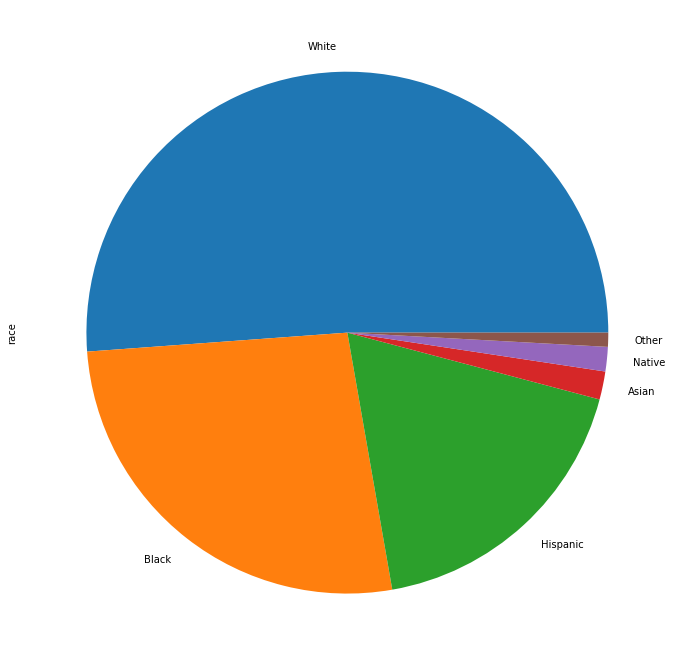

In [151]:
police['race'].value_counts().plot(kind='pie', figsize=(12,12), grid=True);

### Gender of victims

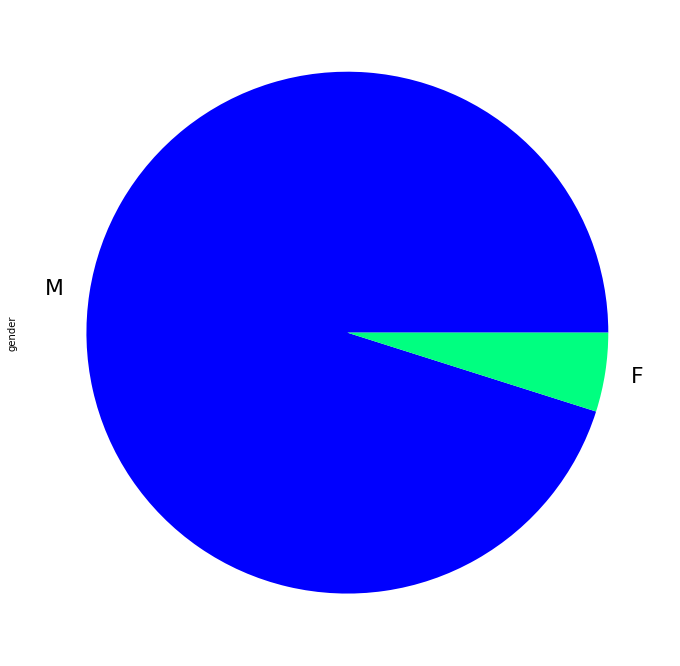

In [177]:
police['gender'].value_counts().plot(kind='pie', figsize=(15,12), cmap='winter', fontsize=22);

#### Amount of shootings per state 

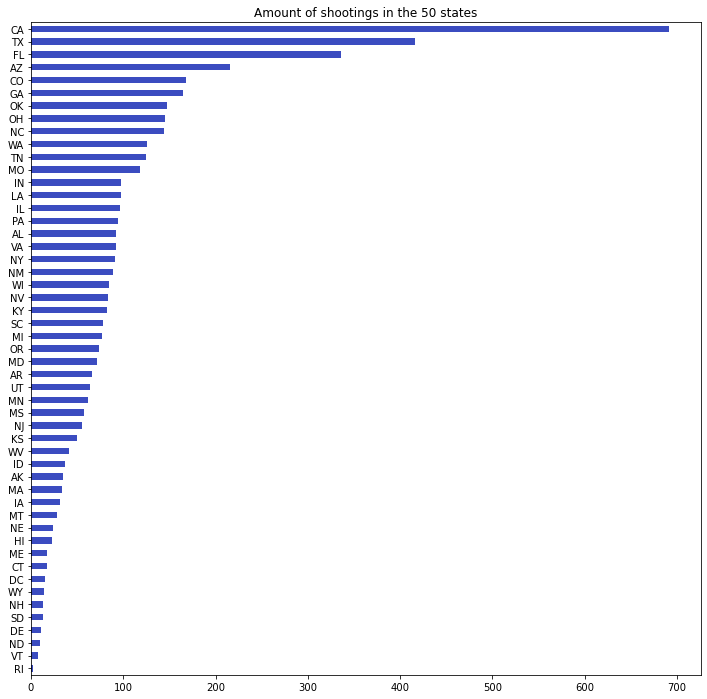

In [183]:
plt.title('Amount of shootings in the 50 states')
police['state'].value_counts(ascending=True).plot(kind='barh', figsize=(12,12), cmap='coolwarm');


#### Manner of death

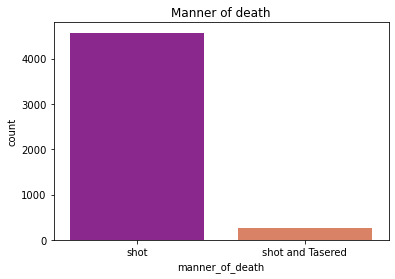

In [191]:
plt.title('Manner of death')
sns.countplot(x='manner_of_death', data=police, palette='plasma');

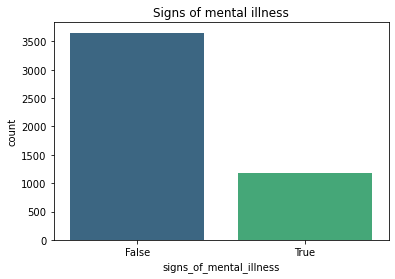

In [194]:
plt.title('Signs of mental illness')
sns.countplot(x='signs_of_mental_illness', data=police, palette='viridis');

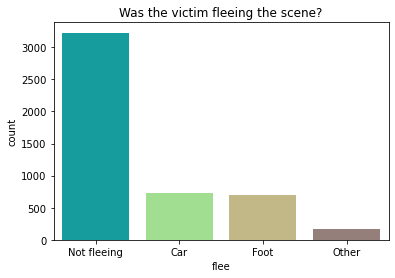

In [199]:
plt.title('Was the victim fleeing the scene?')
sns.countplot(x='flee', data=police, palette='terrain');

In [192]:
police.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,True


### Now we will visualize the amount of shootings per year

In [201]:

# First we have to convert the date column to a datetime index and just grab the year
year = pd.DatetimeIndex(police['date']).year
year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=4828)

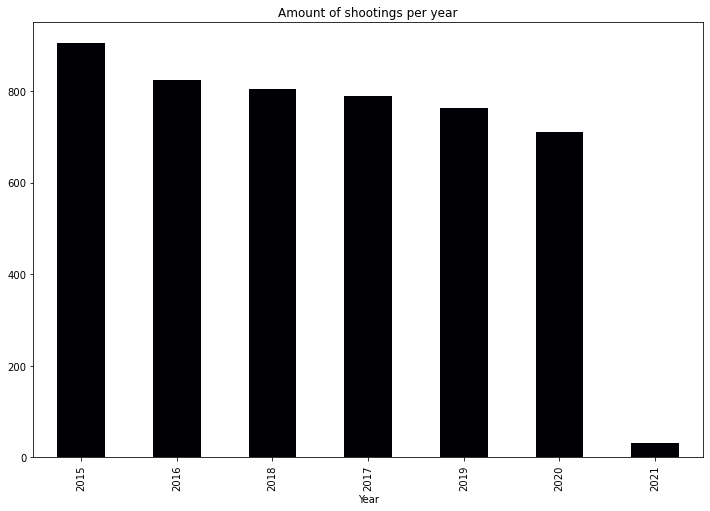

In [214]:
plt.title('Amount of shootings per year')
plt.xlabel('Year')
year.value_counts().plot(kind='bar', figsize=(12,8), cmap ='inferno', fontsize=10);

As we see the most shootings happened in 2015, and since it is only February of 2021 this year has had the least so far. The years 2016- onward the amount of shootings has been very closely consistent. 

### Relationship between gender and race

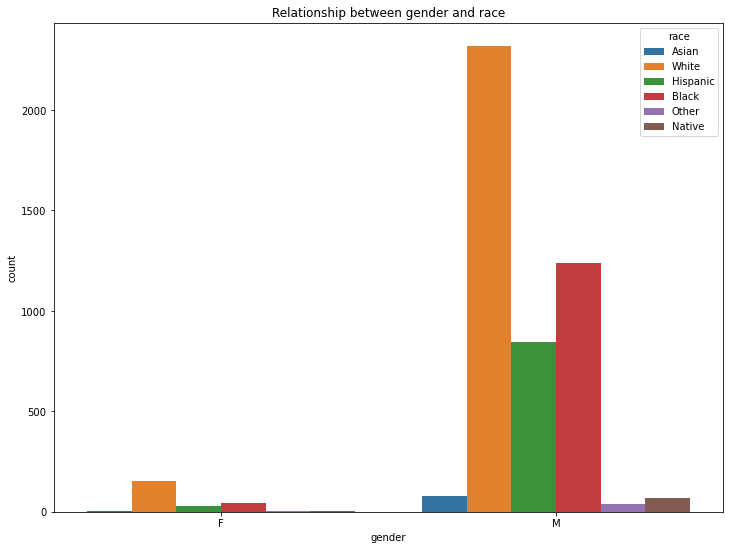

In [217]:
plt.figure(figsize=(12,9))
plt.title('Relationship between gender and race')
sns.countplot(x='gender', data=police, hue='race', order=['F', 'M']);

### Relationship bewteen manner of death and race

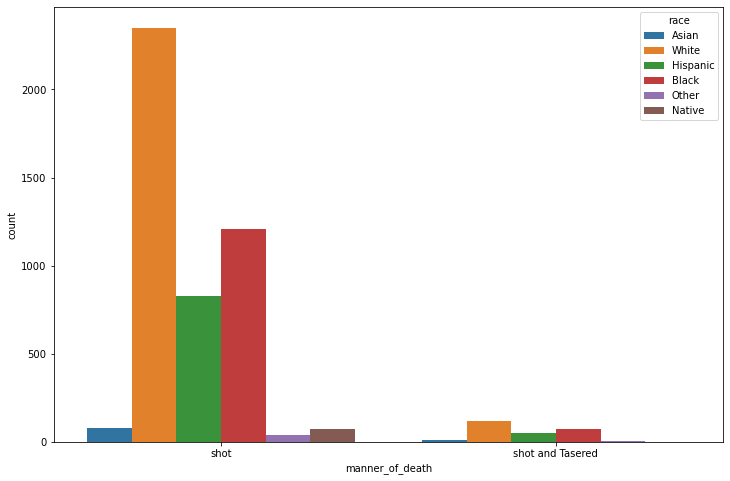

In [218]:
plt.figure(figsize=(12,8))
plt.title('Manner of death and Race')
sns.countplot(x='manner_of_death', data=police, hue='race');

### Relationship between signs of mental illness and race

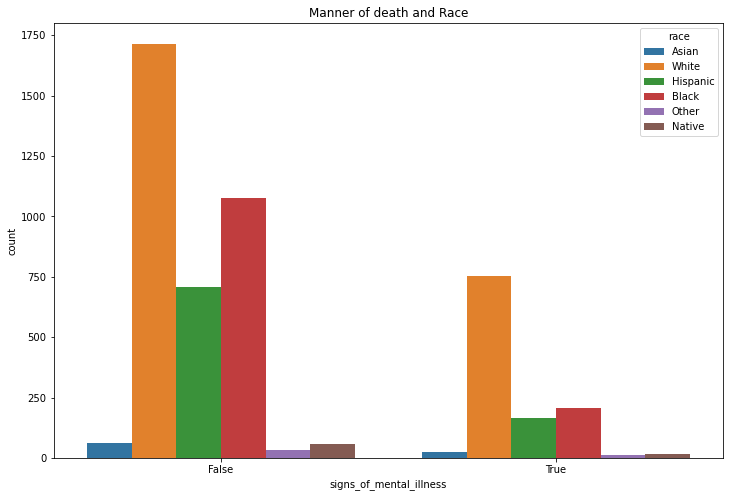

In [221]:
plt.figure(figsize=(12,8))
plt.title('Signs of mental illness within each race')
sns.countplot(x='signs_of_mental_illness', data=police, hue='race');

### Relationship between the signs of mental illness and the manner of death

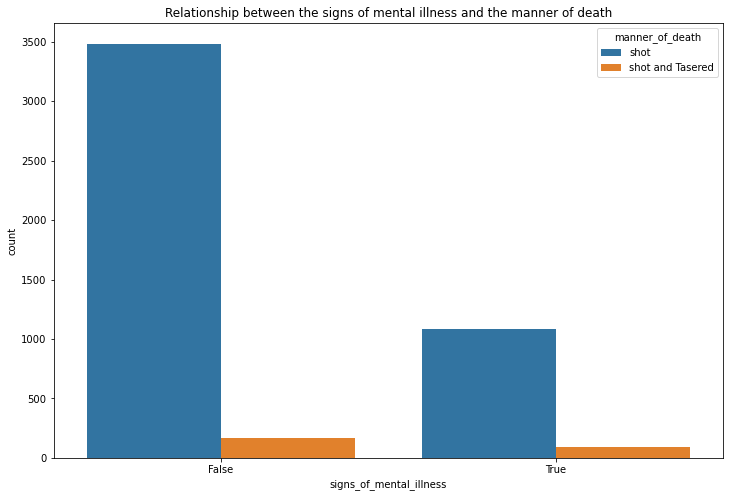

In [223]:
plt.figure(figsize=(12,8))
plt.title('Relationship between the signs of mental illness and the manner of death')
sns.countplot(x='signs_of_mental_illness', data=police, hue='manner_of_death');

### Heat map of correlation

In [235]:
# creating a correlation variable
police_cor = police.corr()

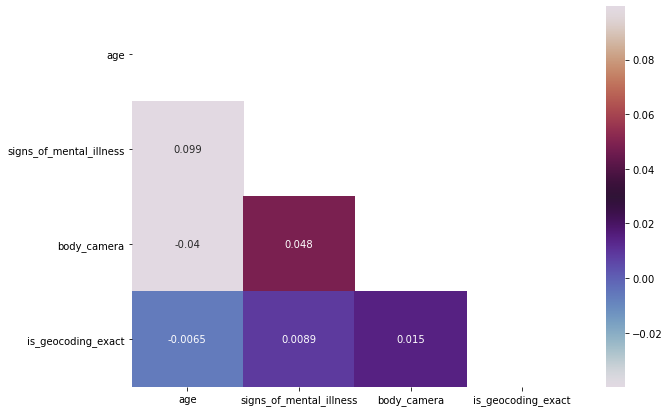

In [234]:
plt.figure(figsize=(10,7))
# creating a mask to be true in the upper right triangle
mask = np.zeros_like(police_cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(police_cor, mask=mask , cmap = "twilight" ,annot=True);

No two variables are strongly correlated. 

# Conclusions and findings

We have analyzed over 4,000 fatal police shootings within the United States from January 2015 until Feburary 2021. The data shows that the rate of fatal police shootings year to year has been steady since 2016. Most of these victims have been indentified as males. The age of most victims varies, there has been some outliers at over 80 years old, but the average age is 36. This is alarming that most victims are very young, there has also been two victims who were only 6 years old. These two victims were not armed of course, as they are just kids. Surprisingly, most of the victims were 'White', when most media coverage is about blacks and hispanics. This data needs to be further explored with the cesus population to determine the actual percentage compared to the composition of race within the United States. The state of California has accounted for over 15% of all fatal shootings in the United States. Approximately 8% of the victims were unarmed. Over 50% of all victims were armed with a gun, which is another alarming statistic. This data needs to be further explored to examine if the victims had a legal right to carry. 